<a href="https://colab.research.google.com/github/slvyarc/Bike-Sharing_Dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Silvia Dharma
- **Email:** silviadharma07@gmail.com
- **ID Dicoding:** silvia_dharma_B3Fq

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca mempengaruhi jumlah pengguna sepeda?
- Bagaimana tren jumlah penyewaan sepeda dalam beberapa tahun terakhir?
- Bagaimana perbedaan pola penggunaan sepeda antara hari kerja (workingday), hari libur (holiday), dan hari biasa (weekday)?
- Apakah ada korelasi antara suhu yang menunjukkan kondisi ketika jumlah penyewaan sepeda tinggi?
- Apakah musim mempengaruhi jumlah penyewa sepeda berdasarkan kategori Casual dan Registered

## Import Semua Packages/Library yang Digunakan

In [1]:
#Library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
#Load tabel "day"

day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Load tabel "hour"

hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai day_df**

In [4]:
# Cek tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Ada 1 tipe data yang tidak sesuai (dteday-object). Data tersebut perlu diperbaiki menjadi dteday -> datetime

In [5]:
# Cek missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat disimpulkan bahwa tidak terdapat missing value pada tabel "day_df"

In [6]:
# Cek duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi 0 artinya tidak ada duplikasi data

In [7]:
#Menampilkan Ringkasan Parameter Statistik

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada masalah pada parameter statistik (aman)

**Menilai "hour_df"**

In [8]:
# Cek tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ada 1 tipe data yang tidak sesuai (dteday-object). Data tersebut perlu diperbaiki menjadi dteday -> datetime

In [9]:
# Cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada duplikasi data (aman)

In [10]:
#Menampilkan Ringkasan Parameter Statistik

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada masalah pada parameter statistik (aman)

### Cleaning Data

**Menghapus tabel yang tidak diperlukan**

In [11]:
# Menghapus tabel "hour_df", karena tidak sesuai dengan pertanyaan bisnis dan untuk isi nya sama dengan tabel "day_df" yang membedakan hanya pada kolom hr.
del hour_df

**Menghapus column yang tidak diperlukan**

In [12]:
# Menghapus column instant (tidak memberikan informasi penting)
# Menghapus column windspeed (tidak sesuai dengan pertanyaan bisnis)
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


**Modifikasi column**

In [13]:
# Mengubah nama column (Opsional)
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [14]:
#Mengganti tipe data pada kolom dateday menjadi datetime.
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int64         
 3   month       731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 80.1 KB


In [15]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [16]:
# Mengubah tipe data
# Kolom weekday, month, year
day_df['weekday'] = day_df['dateday'].dt.day_name()
day_df['month'] = day_df['dateday'].dt.month_name()
day_df['year'] = day_df['dateday'].dt.year

# Kolom season
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Kolom weathersit
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df.head()


,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
day_df.dtypes

dateday       datetime64[ns]
season                object
year                   int64
month                 object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
casual                 int64
registered             int64
count                  int64
dtype: object

**Save data yang telah dicleaning**

In [18]:
day_df.to_csv("cleaned_bikeshare.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore data day_df

**Analisis Statistik Penyewaan Sepeda Berdasarkan Bulan (Month)**

In [19]:
# Mengelompokkan data penyewa sepeda (casual dan registered) berdasarkan bulan
grouped_by_month = day_df.groupby('month')

# Menghitung statistik agregat untuk setiap bulan
aggregated_stats_by_month = grouped_by_month['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_month

,max,min,mean,sum
month,,,,
April,7460,795,4484.900000,269094
August,7865,1115,5664.419355,351194
December,6606,441,3403.806452,211036
February,5062,1005,2655.298246,151352
January,4521,431,2176.338710,134933
July,8173,3285,5563.677419,344948
June,8120,3767,5772.366667,346342
March,8362,605,3692.258065,228920
May,8294,2633,5349.774194,331686


 Dapat disimpulkan bahwa Bulan Juni sebagai bulan dengan jumlah penyewaan sepeda tertinggi, baik dari segi rata-rata maupun total keseluruhan. Sebaliknya, bulan Januari merupakan bulan dengan aktivitas penyewaan sepeda yang paling minim

**Analisis Statistik Penyewaan Sepeda Berdasarkan Cuaca (Weathersit)**

In [20]:
# Mengelompokkan data penyewa sepeda (casual dan registered) berdasarkan cuaca
grouped_by_weather = day_df.groupby('weathersit')

# Menghitung statistik agregat untuk setiap jenis cuaca
aggregated_stats_by_weather = grouped_by_weather['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weather

,max,min,mean,sum
weathersit,,,,
Clear/Partly Cloudy,8714,431,4876.786177,2257952
Light Snow/Rain,4639,22,1803.285714,37869
Misty/Cloudy,8362,605,4035.862348,996858


Kondisi cuaca yang cerah atau sebagian cerah ("Clear/Partly Cloudy") cenderung memiliki jumlah penyewa sepeda yang lebih tinggi, diikuti oleh kondisi cuaca "Misty/Cloudy", sementara kondisi cuaca "Light Snow/Rain" memiliki jumlah penyewa sepeda yang paling rendah.

**Analisis Statistik Penyewaan Sepeda Berdasarkan Hari Libur (Holiday)**

In [21]:
# Mengelompokkan data penyewa sepeda (casual dan registered) berdasarkan hari libur (holiday)
grouped_by_holiday = day_df.groupby('holiday')

# Menghitung statistik agregat untuk setiap kondisi hari libur
aggregated_stats_by_holiday = grouped_by_holiday['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_holiday

,max,min,mean,sum
holiday,,,,
0,8714,22,4527.104225,3214244
1,7403,1000,3735.000000,78435


 Saat bukan hari libur (non-holiday), jumlah penyewa sepeda cenderung lebih tinggi dibandingkan saat hari libur (holiday).

**Perbandingan Aktivitas Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan**

In [22]:
# Membandingkan jumlah penyewa sepeda pada hari kerja (weekday) dan akhir pekan (weekend)
grouped_by_weekday = day_df.groupby('weekday')

# Menghitung statistik agregat untuk jumlah penyewa sepeda pada hari kerja dan akhir pekan
aggregated_stats_by_weekday = grouped_by_weekday['count'].agg(['max', 'min', 'mean'])
aggregated_stats_by_weekday

,max,min,mean
weekday,,,
Friday,8362,1167,4690.288462
Monday,7525,22,4338.123810
Saturday,8714,627,4550.542857
Sunday,8227,605,4228.828571
Thursday,7804,431,4667.259615
Tuesday,7767,683,4510.663462
Wednesday,8173,441,4548.538462


Dari data yang terlihat, urutan rata-rata jumlah penyewa sepeda dari yang paling banyak ke yang paling sedikit adalah: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

**Perbandingan Jumlah Penyewa Sepeda antara Hari Kerja dan Bukan Workingday**

In [23]:
# Mengelompokkan data penyewa sepeda berdasarkan hari kerja
grouped_by_workingday = day_df.groupby('workingday')

# Menghitung statistik agregat untuk jumlah penyewaan sepeda pada hari kerja dan non-hari kerja
aggregated_stats_by_workingday = grouped_by_workingday['count'].agg(['max', 'min', 'mean'])
aggregated_stats_by_workingday

,max,min,mean
workingday,,,
0,8714,605,4330.168831
1,8362,22,4584.820000


Meskipun lebih banyak orang menyewa sepeda pada hari kerja, perbedaan jumlah penyewaan antara hari kerja dan hari non-kerja tidak terlalu besar. Orang masih melakukan penyewaan sepeda secara signifikan pada hari-hari non-kerja juga.

**Analisis Penyewaan Sepeda Berdasarkan Musim (Season)**

In [24]:
# Mengelompokkan data penyewaan sepeda berdasarkan musim
grouped_by_season = day_df.groupby('season')

# Menghitung rata-rata jumlah penyewaan sepeda casual dan registered, serta statistik agregat untuk total penyewaan sepeda
aggregated_stats_by_season = grouped_by_season.agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})
aggregated_stats_by_season

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Musim gugur dan musim panas menunjukkan aktivitas penyewaan sepeda yang lebih tinggi, sedangkan musim semi dan musim dingin memiliki aktivitas yang sedikit lebih rendah tetapi masih signifikan.

**Analisis Statistik Variabel Cuaca Berdasarkan Musim**

In [25]:
# Mengelompokkan data berdasarkan musim dan menghitung statistik agregat untuk variabel suhu (temp),
# suhu yang dirasakan (atemp),
# dan kelembaban udara (hum)
aggregated_stats_by_season = day_df.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})
aggregated_stats_by_season

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Rata-rata temperatur dan suhu rasakan tertinggi terjadi pada musim gugur (fall season), yang kemudian diikuti oleh musim panas (summer), musim dingin (winter), dan musim semi (spring).

Rata-rata kelembaban tertinggi terjadi pada musim dingin (winter season), yang kemudian diikuti oleh musim gugur (fall), musim panas (summer), dan musim semi (spring).

**Hubungan antara Penyewa Casual, Registered, dan Total**

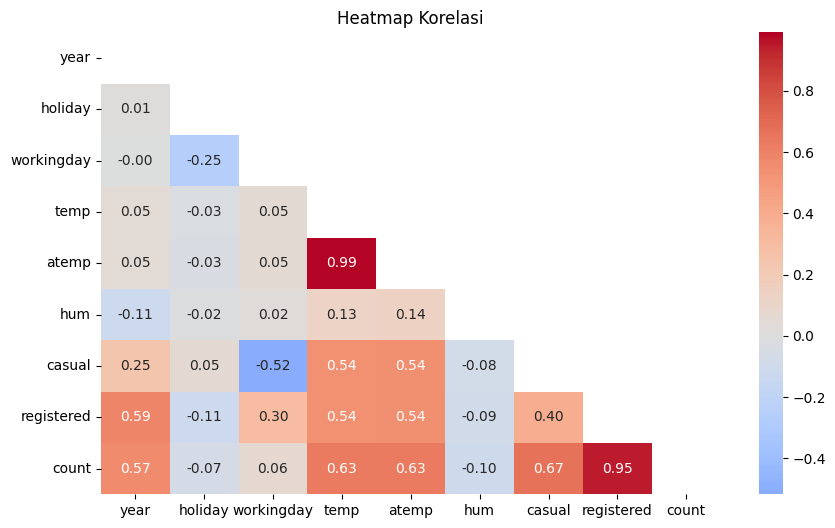

In [26]:
# Membuat correlation heatmap untuk hubungan antara penyewa casual, registered, dan count
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Heatmap Korelasi")
plt.show()


Berdasarkan hasil analisis di atas, dapat disimpulkan beberapa pernyataan sebagai berikut:
- Variabel atemp dan temp memiliki korelasi yang sangat tinggi, yaitu sebesar 0.99, menunjukkan bahwa keduanya memiliki hubungan yang sangat erat.
- Variabel hum memiliki korelasi yang lemah dengan temp dan atemp, yaitu sebesar 0.13 dan 0.14, menunjukkan bahwa hubungan antara kelembaban udara dengan suhu dan suhu rasakan tidak begitu kuat.
- Variabel casual cukup berkorelasi dengan temp dan atemp, dengan koefisien korelasi sebesar 0.54, dan sedikit berkorelasi negatif dengan hum, yaitu sebesar -0.08.
- Variabel registered memiliki pola yang sama dengan casual, dan memiliki korelasi moderat dengan casual sebesar 0.40.
- Variabel count berkorelasi kuat dengan temp, atemp, casual, dan registered, dengan koefisien korelasi masing-masing sebesar 0.63, 0.63, 0.67, dan 0.95. Namun, variabel count memiliki korelasi sedikit negatif dengan hum, yaitu sebesar -0.10.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca mempengaruhi jumlah pengguna sepeda?

<ipython-input-27-eb7136343bad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


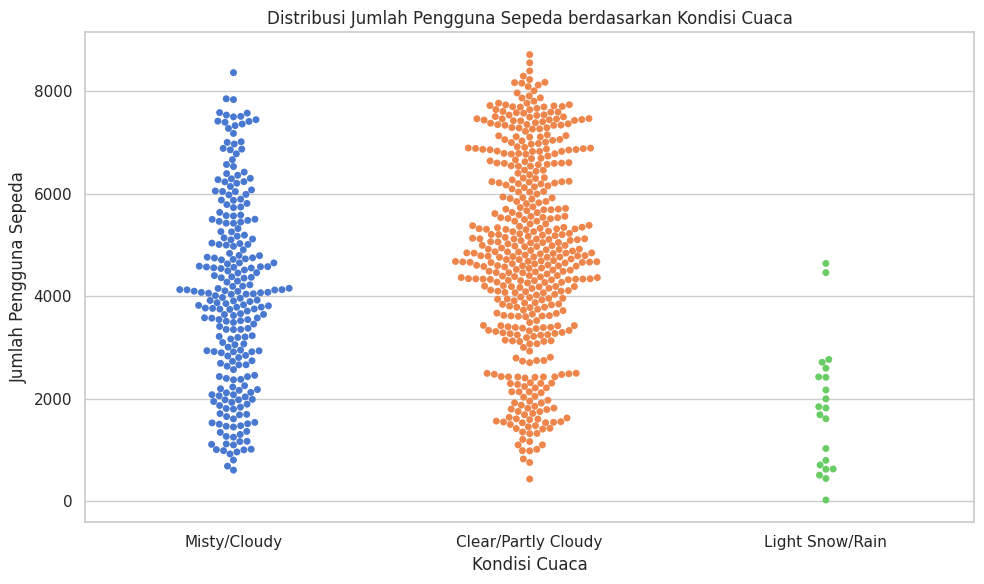

In [27]:
# Setel ukuran dan gaya visual
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Buat swarm plot menggunakan sns.swarmplot()
sns.swarmplot(
    x='weathersit',
    y='count',
    data=day_df,
    palette="muted"
)

# Tambahkan label sumbu dan judul
plt.title('Distribusi Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')

# Tampilkan plot
plt.tight_layout()
plt.show()


Dari hasil swarm plot dapat disimpulkan bahwa kondisi cuaca yang cerah atau sebagian cerah ("Clear/Partly Cloudy") cenderung memiliki jumlah penyewa sepeda yang lebih banyak, diikuti oleh kondisi cuaca "Misty/Cloudy", sementara kondisi cuaca "Light Snow/Rain" memiliki jumlah penyewa sepeda yang paling sedikit. Hal ini membuktikan cuaca dapat mempengaruhi atau berperan penting dalam penggunaan sepeda.

### Pertanyaan 2: Bagaimana tren jumlah penyewaan sepeda dalam beberapa tahun terakhir?





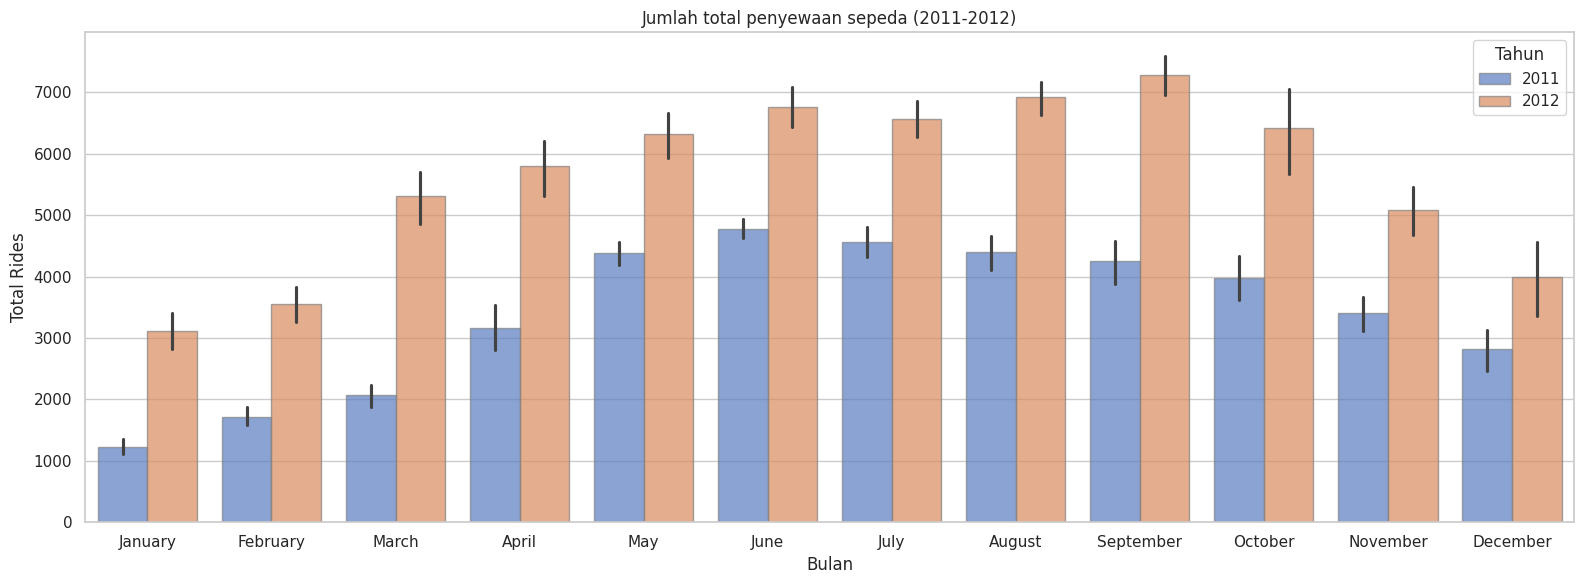

In [28]:
plt.figure(figsize=(16,6))

# Membuat bar plot menggunakan fungsi sns.barplot() dengan variasi warna dan gaya visual
sns.barplot(
    x="month",
    y="count",
    data=day_df,
    hue="year",
    palette="muted",  # Palet warna yang lebih menarik
    alpha=0.7,  # Tingkat transparansi bar
    edgecolor='gray'  # Warna tepi bar
)

# Menambahkan label sumbu dan judul ke plot
plt.xlabel("Bulan")
plt.ylabel("Total Rides")
plt.title("Jumlah total penyewaan sepeda (2011-2012)")

# Menampilkan legenda
plt.legend(title="Tahun", loc="upper right")

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi menggunakan lineplot, terlihat bahwa tren jumlah penyewaan sepeda dalam beberapa tahun terakhir menunjukkan peningkatan dari tahun 2011 hingga 2012. Pada tahun 2012, jumlah penyewaan sepeda secara keseluruhan lebih tinggi daripada tahun 2011, yang ditandai dengan nilai yang lebih tinggi pada sumbu y. Puncak penyewaan sepeda terjadi pada bulan September di tahun 2012, sementara bulan dengan jumlah penyewaan sepeda terendah adalah bulan Januari di tahun yang sama. Di tahun 2011, puncak penyewaan sepeda terjadi pada bulan Juni, dan bulan dengan jumlah penyewaan sepeda terendah juga adalah bulan Januari. Hal ini menunjukkan bahwa meskipun ada fluktuasi dalam jumlah penyewaan sepeda dari bulan ke bulan, secara umum terdapat tren peningkatan dari tahun 2011 ke tahun 2012.

### Pertanyaan 3: Bagaimana perbedaan pola penggunaan sepeda antara hari kerja (workingday), hari libur (holiday), dan hari biasa (weekday)?





<ipython-input-29-f4bd901b445d>:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(
<ipython-input-29-f4bd901b445d>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(
<ipython-input-29-f4bd901b445d>:36: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


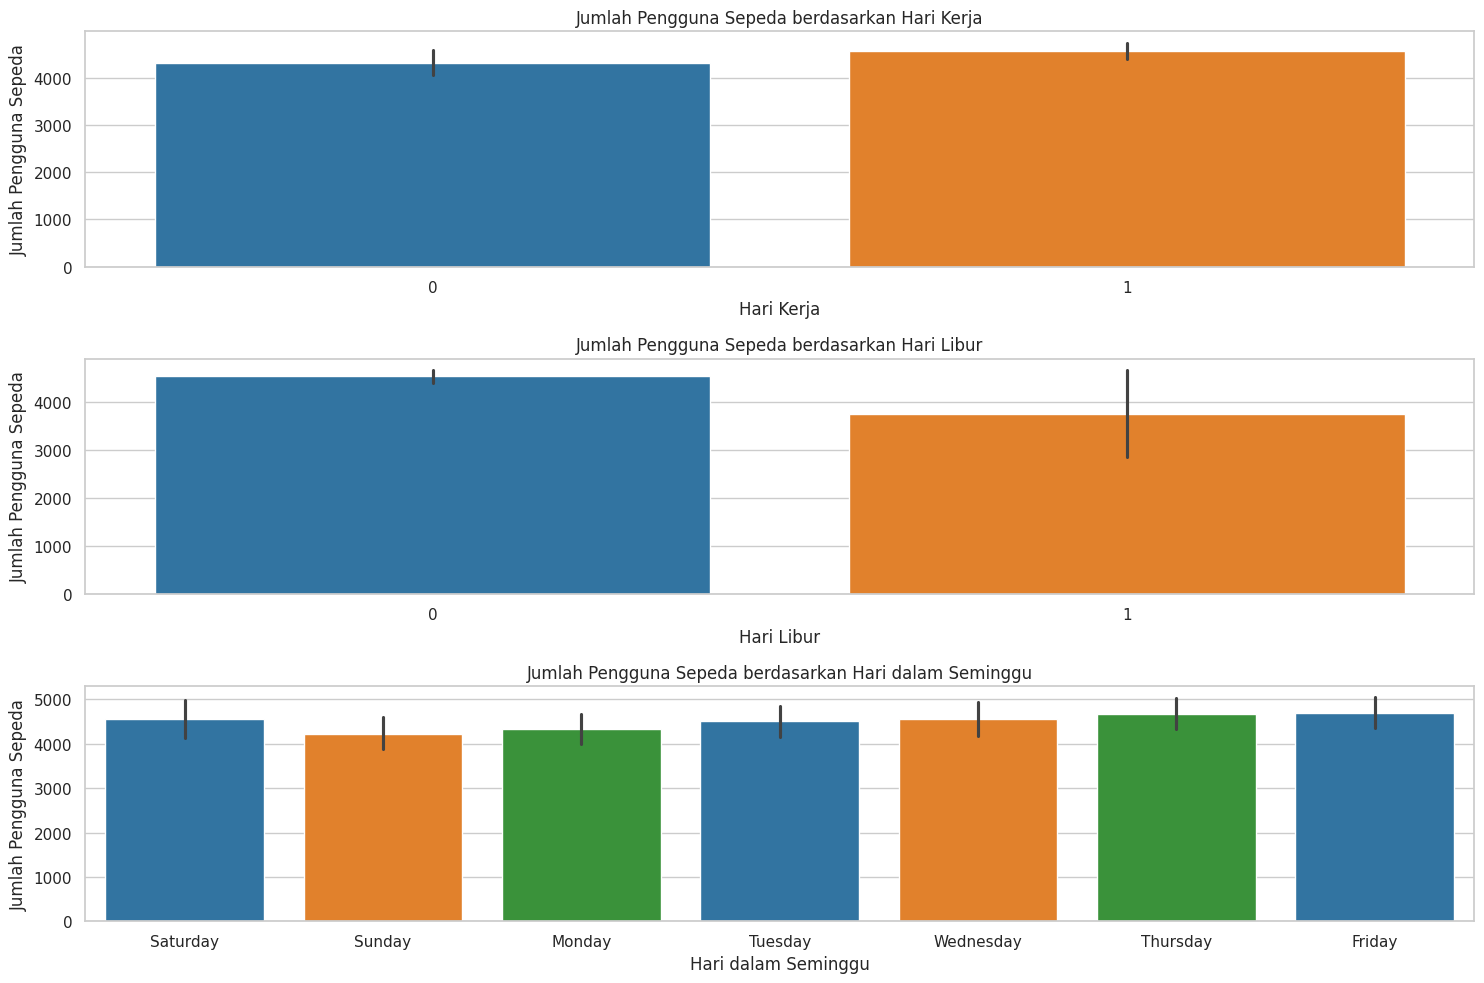

In [29]:
# Tentukan warna palette
palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Buat subplots dengan ukuran dan jumlah yang sesuai
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    hue='workingday',  # Atur hue ke variabel x
    data=day_df,
    ax=axes[0],
    palette=palette,
    legend=False  # Sembunyikan legend
)
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
    x='holiday',
    y='count',
    hue='holiday',  # Atur hue ke variabel x
    data=day_df,
    ax=axes[1],
    palette=palette,
    legend=False  # Sembunyikan legend
)
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    hue='weekday',  # Atur hue ke variabel x
    data=day_df,
    ax=axes[2],
    palette=palette,
    legend=False  # Sembunyikan legend
)
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data menggunakan barplot, diperoleh informasi sebagai berikut:
1. Jumlah penyewa sepeda lebih tinggi pada hari kerja (Senin hingga Jumat) daripada akhir pekan (Sabtu dan Minggu), di mana nilai 0 menunjukkan akhir pekan dan nilai 1 menunjukkan hari kerja.
2. Jumlah penyewa sepeda jauh lebih tinggi pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).
3. Hari Jumat memiliki jumlah penyewa sepeda tertinggi, diikuti oleh hari-hari kerja lainnya, sementara hari Minggu memiliki jumlah penyewa sepeda terendah.

### Pertanyaan 4: Apakah ada korelasi antara suhu yang menunjukkan kondisi ketika jumlah penyewaan sepeda tinggi?



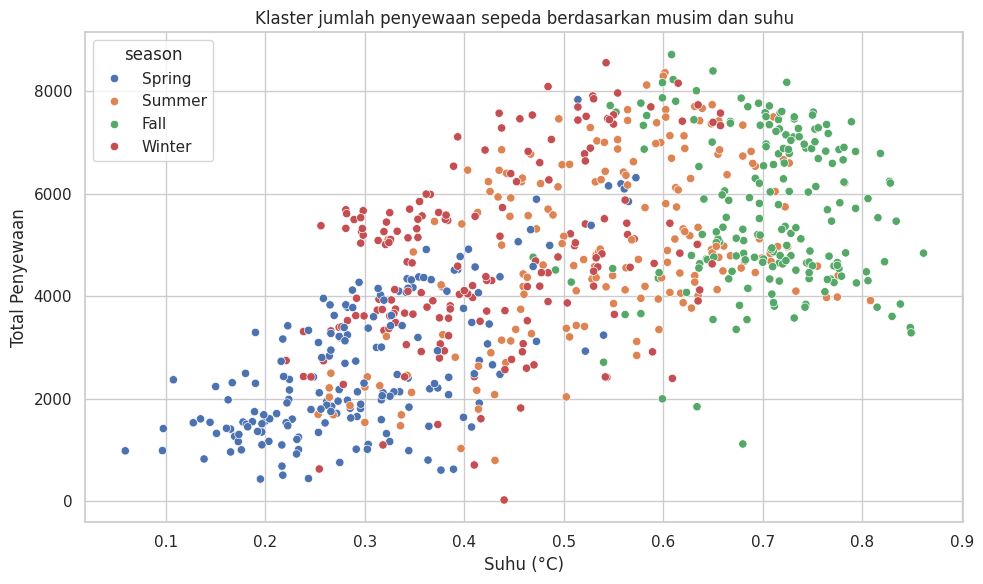

In [30]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='count', data=day_df, hue='season')

plt.xlabel("Suhu (°C)")
plt.ylabel("Total Penyewaan")
plt.title("Klaster jumlah penyewaan sepeda berdasarkan musim dan suhu")

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi data menggunakan scatterplot, diperoleh informasi sebagai berikut:
1. Jumlah penyewaan sepeda cenderung rendah saat suhu lebih rendah, terutama selama musim dingin.
2. Saat suhu meningkat, terjadi peningkatan jumlah penyewaan sepeda, terutama selama musim panas.
3. Ada "titik optimal" suhu di mana jumlah penyewaan sepeda mencapai puncaknya, terutama pada selama musim gugur dan musim panas.
4. Hari-hari dengan kondisi suhu di "titik optimal" tersebut cenderung memiliki jumlah penyewaan sepeda yang tinggi karena cuaca yang nyaman untuk bersepeda.

### Pertanyaan 5: Apakah musim mempengaruhi jumlah penyewa sepeda berdasarkan kategori Casual dan Registered



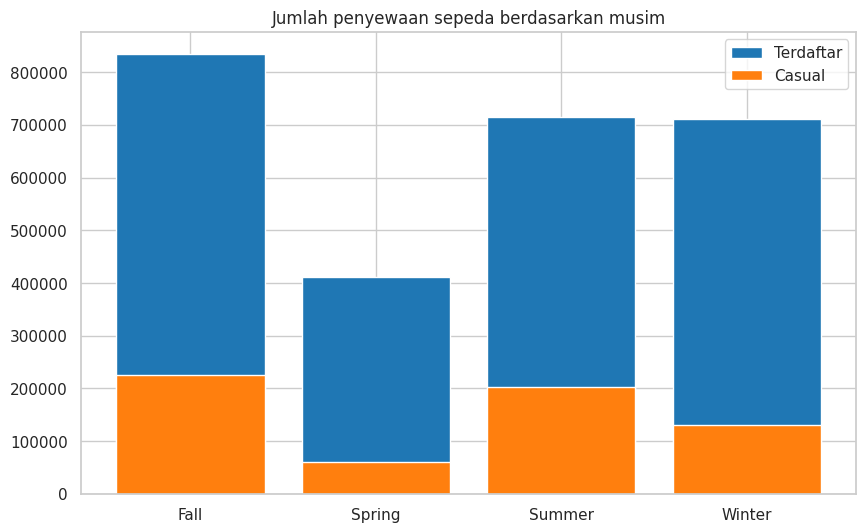

In [31]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
penggunaan_musiman = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat bar plot
plt.bar(
    penggunaan_musiman['season'],
    penggunaan_musiman['registered'],
    label='Terdaftar',
    color='tab:blue'
)

plt.bar(
    penggunaan_musiman['season'],
    penggunaan_musiman['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()


Analisis menggunakan barplot menunjukkan bahwa aktivitas penyewaan sepeda paling tinggi terjadi selama musim gugur (Fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan terakhir musim semi (Spring). Ini berlaku baik untuk pengguna terdaftar maupun pengguna casual.

## Conclusion

- Conclution pertanyaan 1: Kondisi cuaca memang mempengaruhi jumlah pengguna sepeda. Pada hari-hari dengan kondisi cuaca yang baik, seperti cerah atau berawan, jumlah pengguna sepeda cenderung meningkat. Sebaliknya, saat kondisi cuaca buruk, seperti hujan atau salju, jumlah pengguna sepeda cenderung menurun.
- Conclution pertanyaan 2: Terdapat peningkatan secara keseluruhan dari tahun ke tahun. Pada tahun 2011, jumlah penyewaan sepeda cenderung lebih rendah dibandingkan dengan tahun 2012. Peningkatan tersebut dapat dilihat terutama pada rentang bulan Mei hingga Oktober di kedua tahun tersebut.
- Conclution pertanyaan 3: Pola penggunaan sepeda menunjukkan perbedaan yang signifikan antara hari kerja (workingday), hari libur (holiday), dan hari biasa (weekday). Jumlah pengguna sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur, meskipun perbedaannya tidak terlalu signifikan. Selain itu, hari biasa juga menunjukkan variasi dalam jumlah penggunaan sepeda, di mana Hari Jumat mencatat jumlah penggunaan tertinggi, sementara Minggu menunjukkan jumlah penggunaan terendah. Hal ini mencerminkan preferensi dan kebiasaan pengguna dalam menggunakan sepeda sesuai dengan konteks waktu dan aktivitas harian.
- Conclution pertanyaan 4:Terdapat hubungan yang jelas antara suhu dan jumlah penyewaan sepeda. Saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat, terutama selama musim panas. Sebaliknya, jumlah penyewaan cenderung rendah saat suhu lebih rendah, khususnya selama musim dingin.
- Conclution pertanyaan 5: Terdapat pengaruh musim terhadap jumlah penyewa sepeda baik dalam kategori Casual maupun Registered. Musim gugur dan musim panas merupakan musim dengan jumlah penyewa sepeda tertinggi, diikuti oleh musim semi dan musim dingin yang cenderung memiliki jumlah penyewa sepeda yang lebih rendah.